In [52]:
import re
from glob import iglob, glob
import matplotlib.pyplot as plt
from astropy.io import ascii
from lightkurve import MPLSTYLE
from lightkurve import open as open_lc
from lightkurve.utils import running_mean

In [9]:
reg = re.compile(r'(\d{8,9})([OPT][RCH])')

def decode_filename(filepath):
    """
    Function to decode LightCurveFITS filenames:
    {TICID}{Type}.fits
    
    Types: Threshold (TH), Pipeline (OR), Percentile (PER)
    
    :param filepath: filepath to FITS file
    :return: ticid, aperture type
    """
    ticid, code = reg.search(filepath).groups()
    if code.upper() == 'TH':
        ap_type = 'Threshold'
    elif code.upper() == 'OR':
        ap_type = 'Pipeline'
    else:
        ap_type = 'Percentile'
    return ticid, ap_type

In [56]:
# Import target list
targets = ascii.read('DataInput/cluster_targets_tic.ecsv')

# Get filepaths to LightCurve FITS
src_lcfs = 'LightCurvesFITS/*.fits'
fits_paths = glob(src_lcfs)

# Define Program parameters
outlier_sigma = 3.0

In [75]:
fits_path = fits_paths[4]

ticid, ap_type = decode_filename(fits_path)

lcf = open_lc(fits_path)

lc = lcf.get_lightcurve('FLUX').remove_outliers(sigma=outlier_sigma)

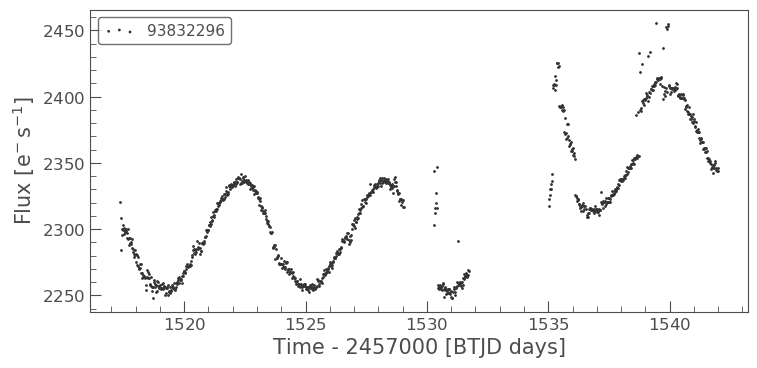

In [76]:
lc.scatter()

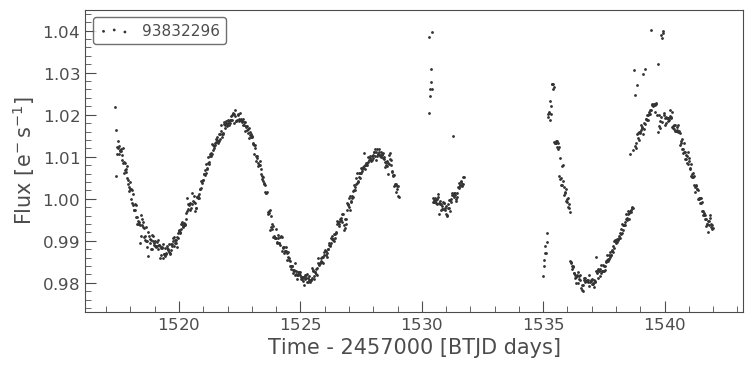

In [78]:
cleaned = lc.flatten(501)
cleaned.scatter()

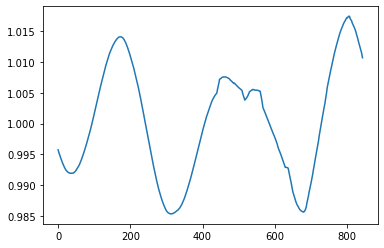

In [97]:
mean = running_mean(data=cleaned.flux, window_size=)
plt.plot(mean)